In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from PIL import Image
import os
import torch.optim as optim
from torchvision import transforms,models
from torchvision.transforms.functional import crop
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import cv2
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from CNN2 import *

/tmp/ipykernel_23129/3941340967.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


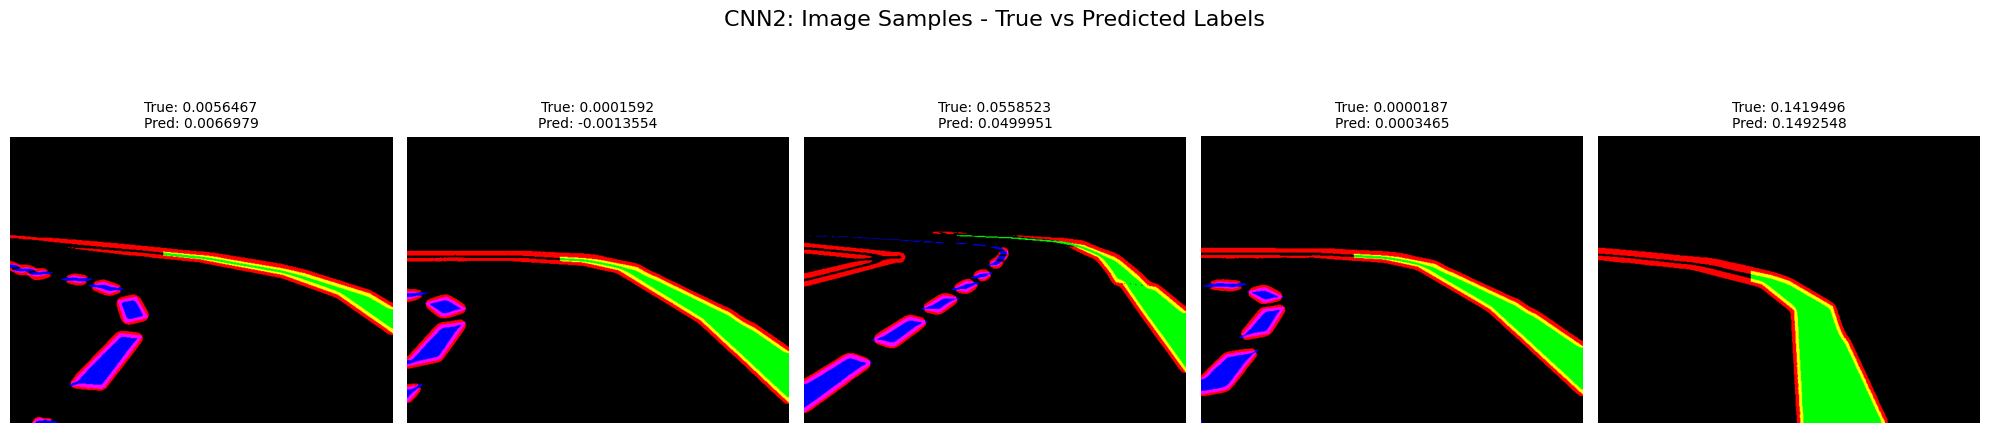

In [5]:
def visualize_predictions(model_path, test_loader, device):

    input_shape = (3, 480, 640)  
    model = LaneDetectionCNN(input_shape=input_shape)
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()

    test_iter = iter(test_loader)
    images, true_labels = next(test_iter)  
    images, true_labels = images.to(device), true_labels.to(device)

    with torch.no_grad():
        predictions = model(images)
        predictions = predictions.squeeze(-1) 


    batch_size, _, _, _ = images.shape

    num_images =    batch_size

    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    fig.suptitle("CNN2: Image Samples - True vs Predicted Labels", fontsize=16)
    
    for i in range(num_images):
        ax = axes[i] 
        img = to_pil_image(images[i].cpu())
        true_label = true_labels[i].item()
        predicted_label = predictions[i].item()

        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"True: {true_label:.7f}\nPred: {predicted_label:.7f}", fontsize=10)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85) 
    plt.show()

if __name__ == "__main__":

    model_path = "models/lane_detection_CNN2.pth"
    device = "cpu" #torch.device("cuda" if torch.cuda.is_available() else "cpu")

    image_folder =  "../datasets/trail2/images"
    lablel_folder = "../datasets/trail2/labels"
    batch_size = 5  
    transform = get_transform()
    _, _, test_loader = loader_creator(image_folder, lablel_folder, transform=transform, batch_size=batch_size, train_split=0.6, val_split=0.2)

    visualize_predictions(model_path, test_loader, device)
